# By Using Z-Score Method

In [26]:
# Step 1: Import the required libraries
import pandas as pd
import numpy as np
from numpy import array

data = {'Age': [20, 21, 22, 23, 24, 25,26, 27, 28, 29, 30, 50]}

# Step 2: Create the data
df = pd.DataFrame(data)

In [27]:
# Step 3: Calculate the mean and standard deviation
mean = np.mean(df['Age'])
std = np.std(df['Age'])

In [28]:
df['Z-Score'] = (df['Age'] - mean) / std
df

,Age,Z-Score
0,20,-0.938954
1,21,-0.806396
2,22,-0.673838
3,23,-0.541280
4,24,-0.408721
5,25,-0.276163
6,26,-0.143605
7,27,-0.011047
8,28,0.121512
9,29,0.254070


In [29]:
# Step 5: Print the data
print("----------------------------------------")
print(f"Here is the data with outliers:\n {df}")
print("----------------------------------------")
# Step 6: Print the outliers
print(f"Here are the outliers based on the z-score threshold, 3:\n {df[df['Z-Score'] > 3]}")
print("----------------------------------------")
# Step 7: Remove the outliers
df = df[df['Z-Score'] <= 3]

# Step 8: Print the data without outliers
print(f"Here is the data without outliers:\n {df}")

----------------------------------------
Here is the data with outliers:
     Age   Z-Score
0    20 -0.938954
1    21 -0.806396
2    22 -0.673838
3    23 -0.541280
4    24 -0.408721
5    25 -0.276163
6    26 -0.143605
7    27 -0.011047
8    28  0.121512
9    29  0.254070
10   30  0.386628
11   50  3.037793
----------------------------------------
Here are the outliers based on the z-score threshold, 3:
     Age   Z-Score
11   50  3.037793
----------------------------------------
Here is the data without outliers:
     Age   Z-Score
0    20 -0.938954
1    21 -0.806396
2    22 -0.673838
3    23 -0.541280
4    24 -0.408721
5    25 -0.276163
6    26 -0.143605
7    27 -0.011047
8    28  0.121512
9    29  0.254070
10   30  0.386628


# Z-score method using scipy

In [46]:
# Import libraries
import numpy as np
from scipy import stats

In [47]:
# Sample data
data = [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110.0]

# Calculate the Z-score for each data point
z_scores = np.abs(stats.zscore(data))

# Set a threshold for identifying outliers
threshold = 2.5 
outliers = np.where(z_scores > threshold)[0]

# print the data
print("----------------------------------------")
print("Data:", data)
print("----------------------------------------")

print("Indices of Outliers:", outliers)
print("Outliers:", [data[i] for i in outliers])

# Remove outliers
data = [data[i] for i in range(len(data)) if i not in outliers]
print("----------------------------------------")
print("Data without outliers:", data)

----------------------------------------
Data: [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110.0]
----------------------------------------
Indices of Outliers: [9]
Outliers: [110.0]
----------------------------------------
Data without outliers: [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0]


# By Using IQR (Inter Quartile Range)

In [3]:
# Step 1: Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Step 2: Dataset 
np.random.seed(0)
data = np.random.normal(100,20,200)
data = np.append(data, [300,5]) # Potential Outliers Adding here
data


array([135.28104692, 108.00314417, 119.57475968, 144.81786398,
       137.3511598 ,  80.4544424 , 119.00176835,  96.97285583,
        97.93562296, 108.21197004, 102.88087142, 129.08547014,
       115.2207545 , 102.43350033, 108.87726465, 106.67348655,
       129.88158146,  95.89683472, 106.26135403,  82.91808521,
        48.94020368, 113.07237191, 117.28872398,  85.15669959,
       145.39509248,  70.91268651, 100.91517035,  96.256323  ,
       130.65558429, 129.3871754 , 103.09894851, 107.56325039,
        82.24428505,  60.38407064,  93.04175701, 103.12697938,
       124.60581361, 124.04759698,  92.25346365,  93.95394499,
        79.0289407 ,  71.59964126,  65.87459619, 139.0155079 ,
        89.80695636,  91.23851397,  74.9440928 , 115.54980712,
        67.72204305,  95.7451944 ,  82.09066878, 107.73804996,
        89.78389725,  76.38735632,  99.43635543, 108.56663741,
       101.33034445, 106.04943795,  87.31355813,  92.74517668,
        86.55079104,  92.80893677,  83.73707436,  65.47

In [7]:
# Step 3: Calculating IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)

IQR = Q3 - Q1

# Outlier Critarea 1.5 times the IQR

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR


outliers = (data < lower_bound) | (data > upper_bound)
data_no_outliers = data[~outliers]
data_no_outliers

array([135.28104692, 108.00314417, 119.57475968, 144.81786398,
       137.3511598 ,  80.4544424 , 119.00176835,  96.97285583,
        97.93562296, 108.21197004, 102.88087142, 129.08547014,
       115.2207545 , 102.43350033, 108.87726465, 106.67348655,
       129.88158146,  95.89683472, 106.26135403,  82.91808521,
        48.94020368, 113.07237191, 117.28872398,  85.15669959,
       145.39509248,  70.91268651, 100.91517035,  96.256323  ,
       130.65558429, 129.3871754 , 103.09894851, 107.56325039,
        82.24428505,  60.38407064,  93.04175701, 103.12697938,
       124.60581361, 124.04759698,  92.25346365,  93.95394499,
        79.0289407 ,  71.59964126,  65.87459619, 139.0155079 ,
        89.80695636,  91.23851397,  74.9440928 , 115.54980712,
        67.72204305,  95.7451944 ,  82.09066878, 107.73804996,
        89.78389725,  76.38735632,  99.43635543, 108.56663741,
       101.33034445, 106.04943795,  87.31355813,  92.74517668,
        86.55079104,  92.80893677,  83.73707436,  65.47

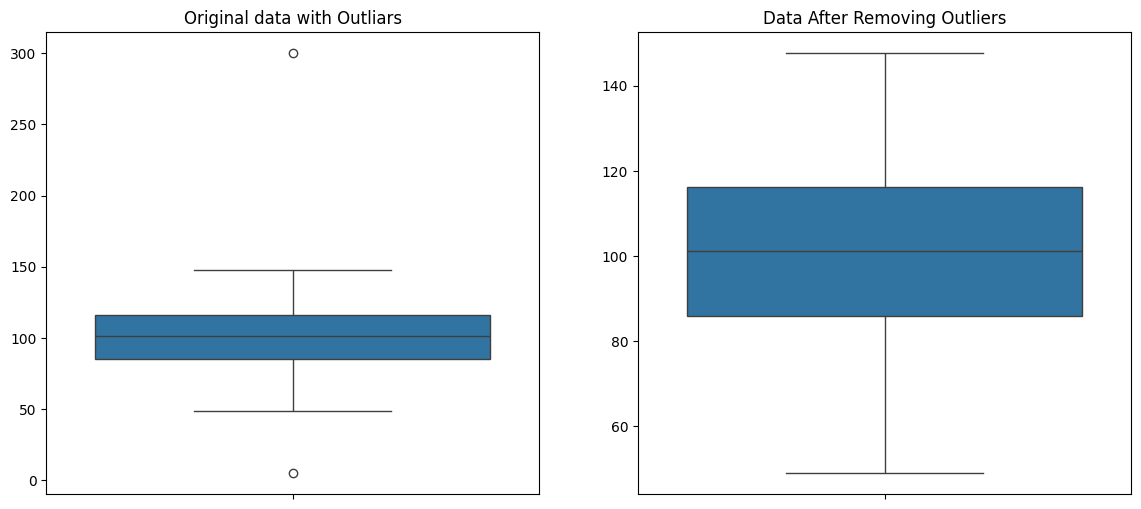

In [13]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.boxplot(data=data)
plt.title('Original data with Outliars')

plt.subplot(1,2,2)
sns.boxplot(data=data_no_outliers)
plt.title('Data After Removing Outliers')
plt.show()


# by using K-Mean Clustring

In [48]:
# Import library
from sklearn.cluster import KMeans

In [49]:
# Sample data
data = [[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]

# Create a K-means model with two clusters (normal and outlier)
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(data)

# Predict cluster labels
labels = kmeans.predict(data)

# Identify outliers based on cluster labels
outliers = [data[i] for i, label in enumerate(labels) if label == 1]

# print data
print("Data:", data)
print("Outliers:", outliers)
# Remove outliers
data = [data[i] for i, label in enumerate(labels) if label == 0]
print("Data without outliers:", data)

Data: [[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]
Outliers: [[2, 2], [3, 3], [3, 4]]
Data without outliers: [[30, 30], [31, 31], [32, 32]]
